In [1]:
# Libraries
# Standard Libraries
from collections import OrderedDict

# Third-Party Libraries
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
location = "C:/Users/Jotham/OneDrive/Documents/Deep Health Hacks/diabetes-training.csv"
train_data = pd.read_csv(location)
train_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
train_data.info()
list(train_data.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100705 entries, 0 to 100704
Data columns (total 50 columns):
encounter_id                100702 non-null float64
patient_nbr                 100702 non-null float64
race                        100702 non-null object
gender                      100702 non-null object
age                         100702 non-null object
weight                      100702 non-null object
admission_type_id           100702 non-null float64
discharge_disposition_id    100702 non-null float64
admission_source_id         100702 non-null float64
time_in_hospital            100702 non-null float64
payer_code                  100702 non-null object
medical_specialty           100702 non-null object
num_lab_procedures          100702 non-null float64
num_procedures              100702 non-null float64
num_medications             100702 non-null float64
number_outpatient           100702 non-null float64
number_emergency            100702 non-null float64
number_inpa

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

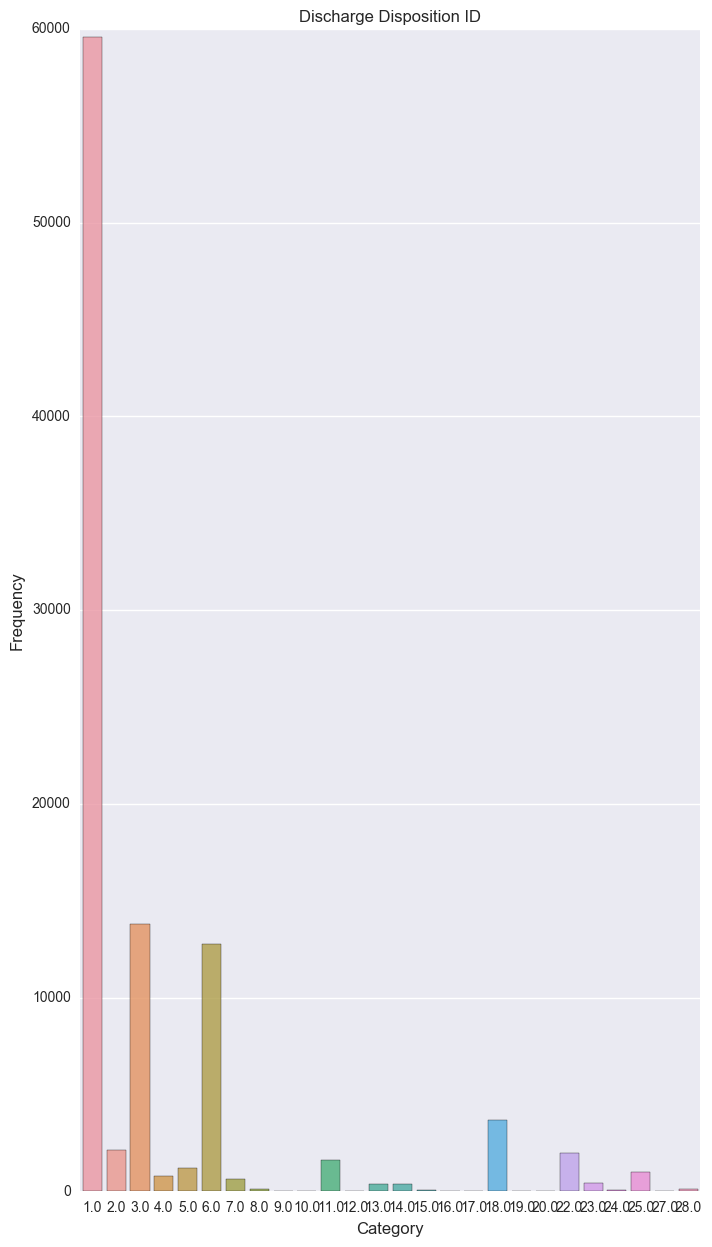

In [4]:
plt.figure(figsize=(8, 15))
cnt_admin_id = train_data["discharge_disposition_id"].value_counts()
sns.barplot(cnt_admin_id.index, cnt_admin_id.values, alpha=0.8)
plt.title("Discharge Disposition ID")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

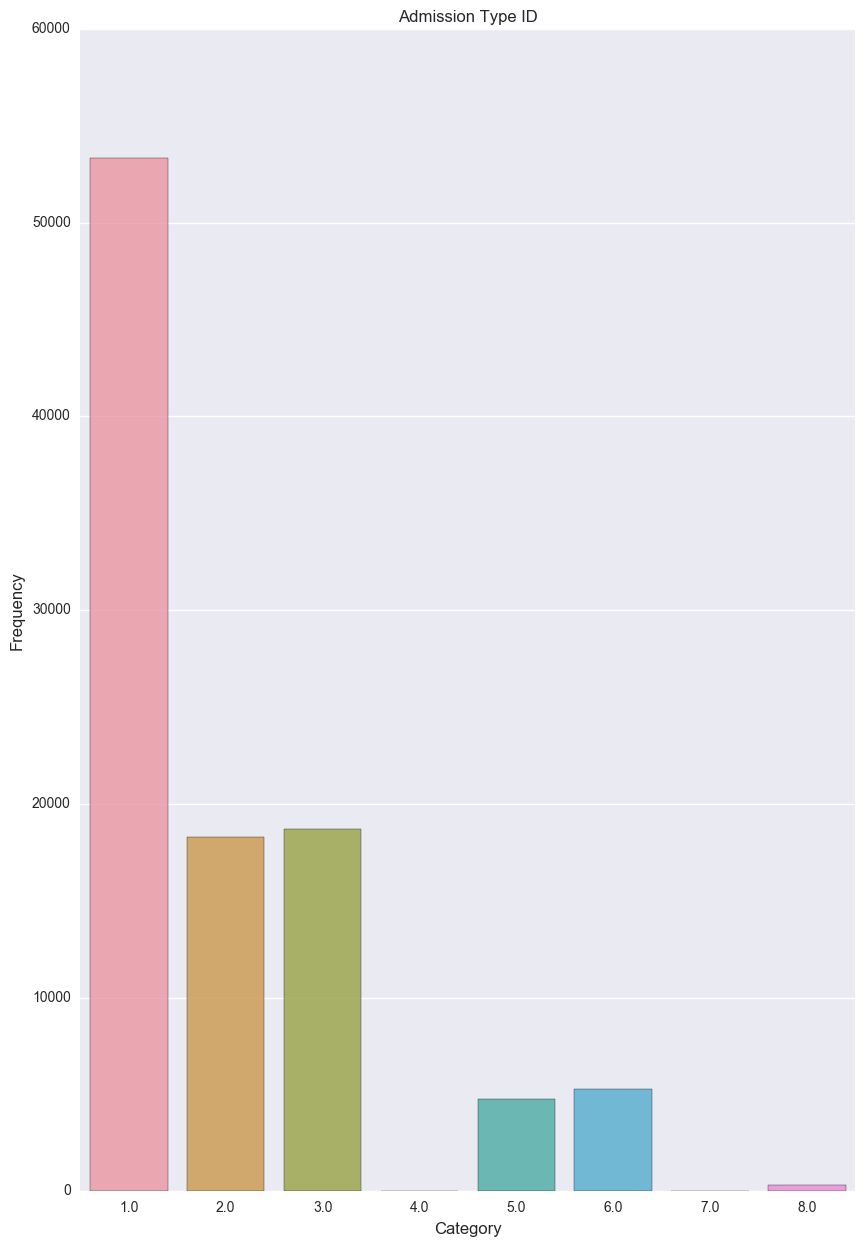

In [5]:
plt.figure(figsize=(10, 15))
cnt_gender = train_data["admission_type_id"].value_counts()
sns.barplot(cnt_gender.index, cnt_gender.values, alpha=0.8)
plt.ylabel("admission_type_id", fontsize=12)
plt.title("Admission Type ID")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency")

plt.show()

## Patient Data Descriptor

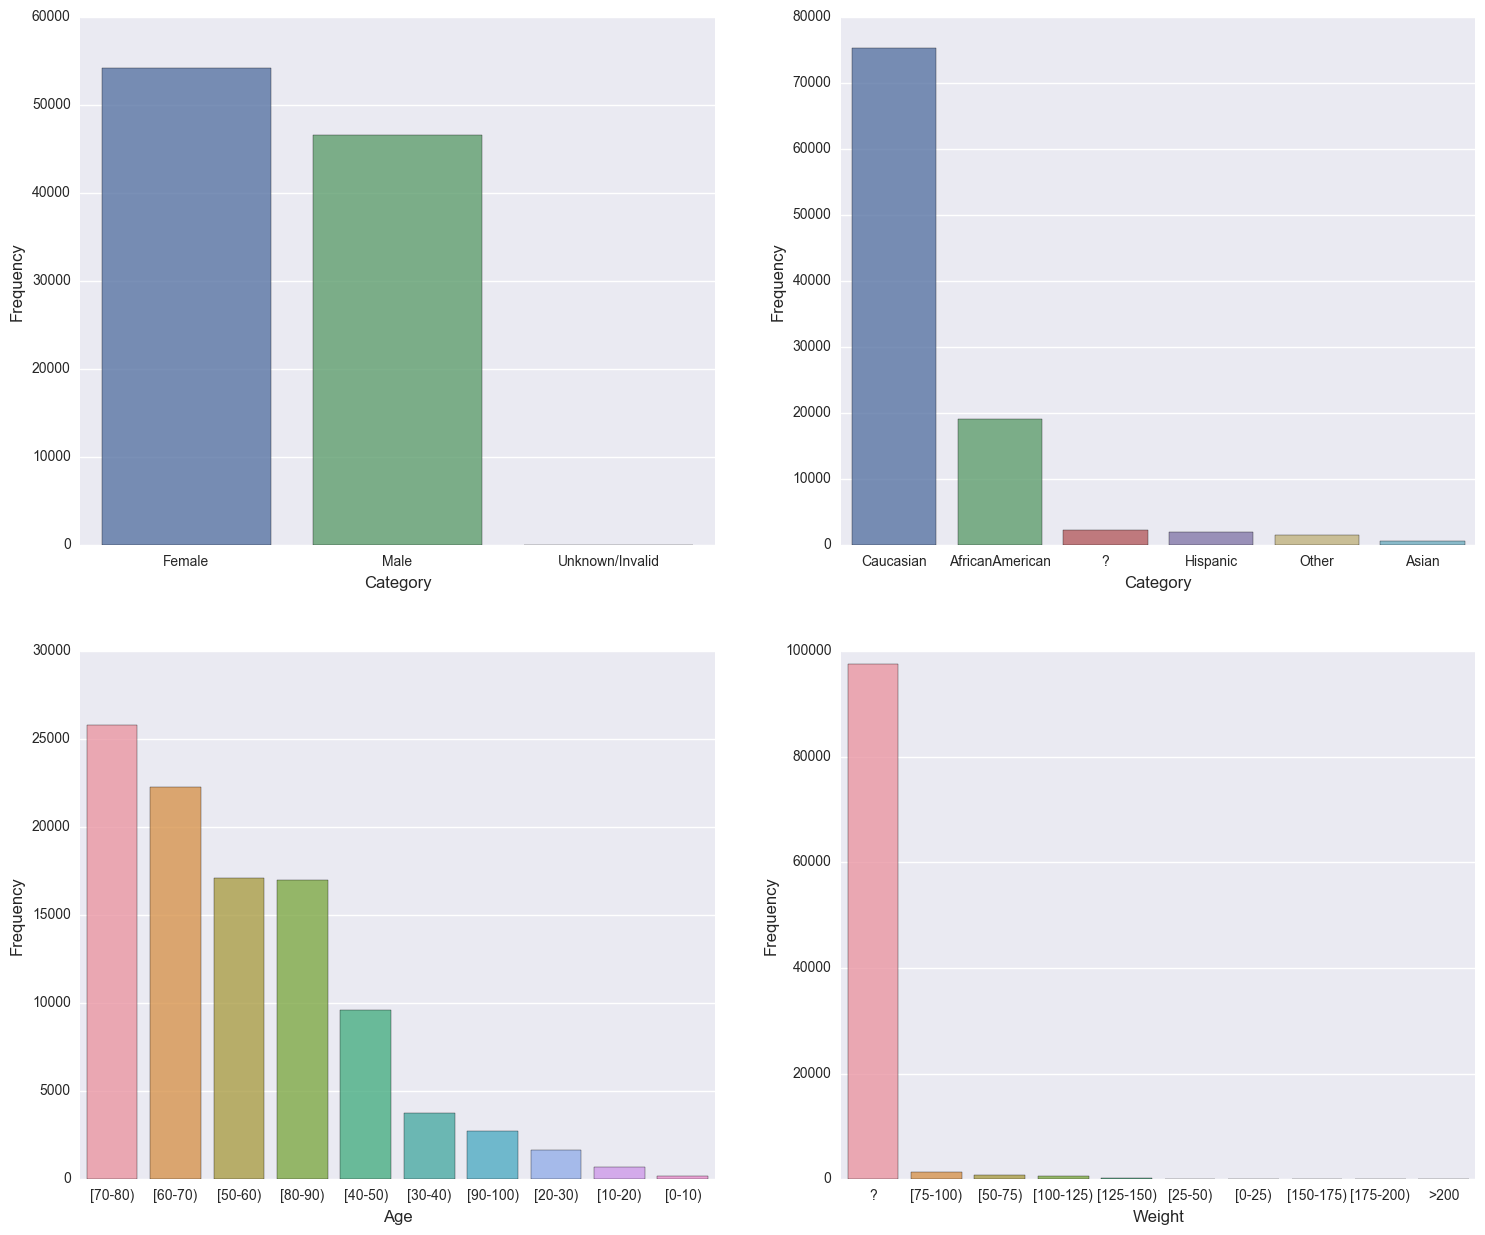

In [6]:
plt.figure(figsize=(18, 15))
plt.subplot(2, 2, 1)
cnt_gender = train_data["gender"].value_counts()
sns.barplot(cnt_gender.index, cnt_gender.values, alpha=0.8)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.xlabel("Category")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
cnt_race = train_data["race"].value_counts()
sns.barplot(cnt_race.index, cnt_race.values, alpha=0.8)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xlabel("Race", fontsize=12)
plt.xlabel("Category")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
cnt_age = train_data["age"].value_counts()
sns.barplot(cnt_age.index, cnt_age.values, alpha=0.8)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
cnt_weight = train_data["weight"].value_counts()
sns.barplot(cnt_weight.index, cnt_weight.values, alpha=0.8)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Frequency")

plt.show()

## Hospital Descriptors

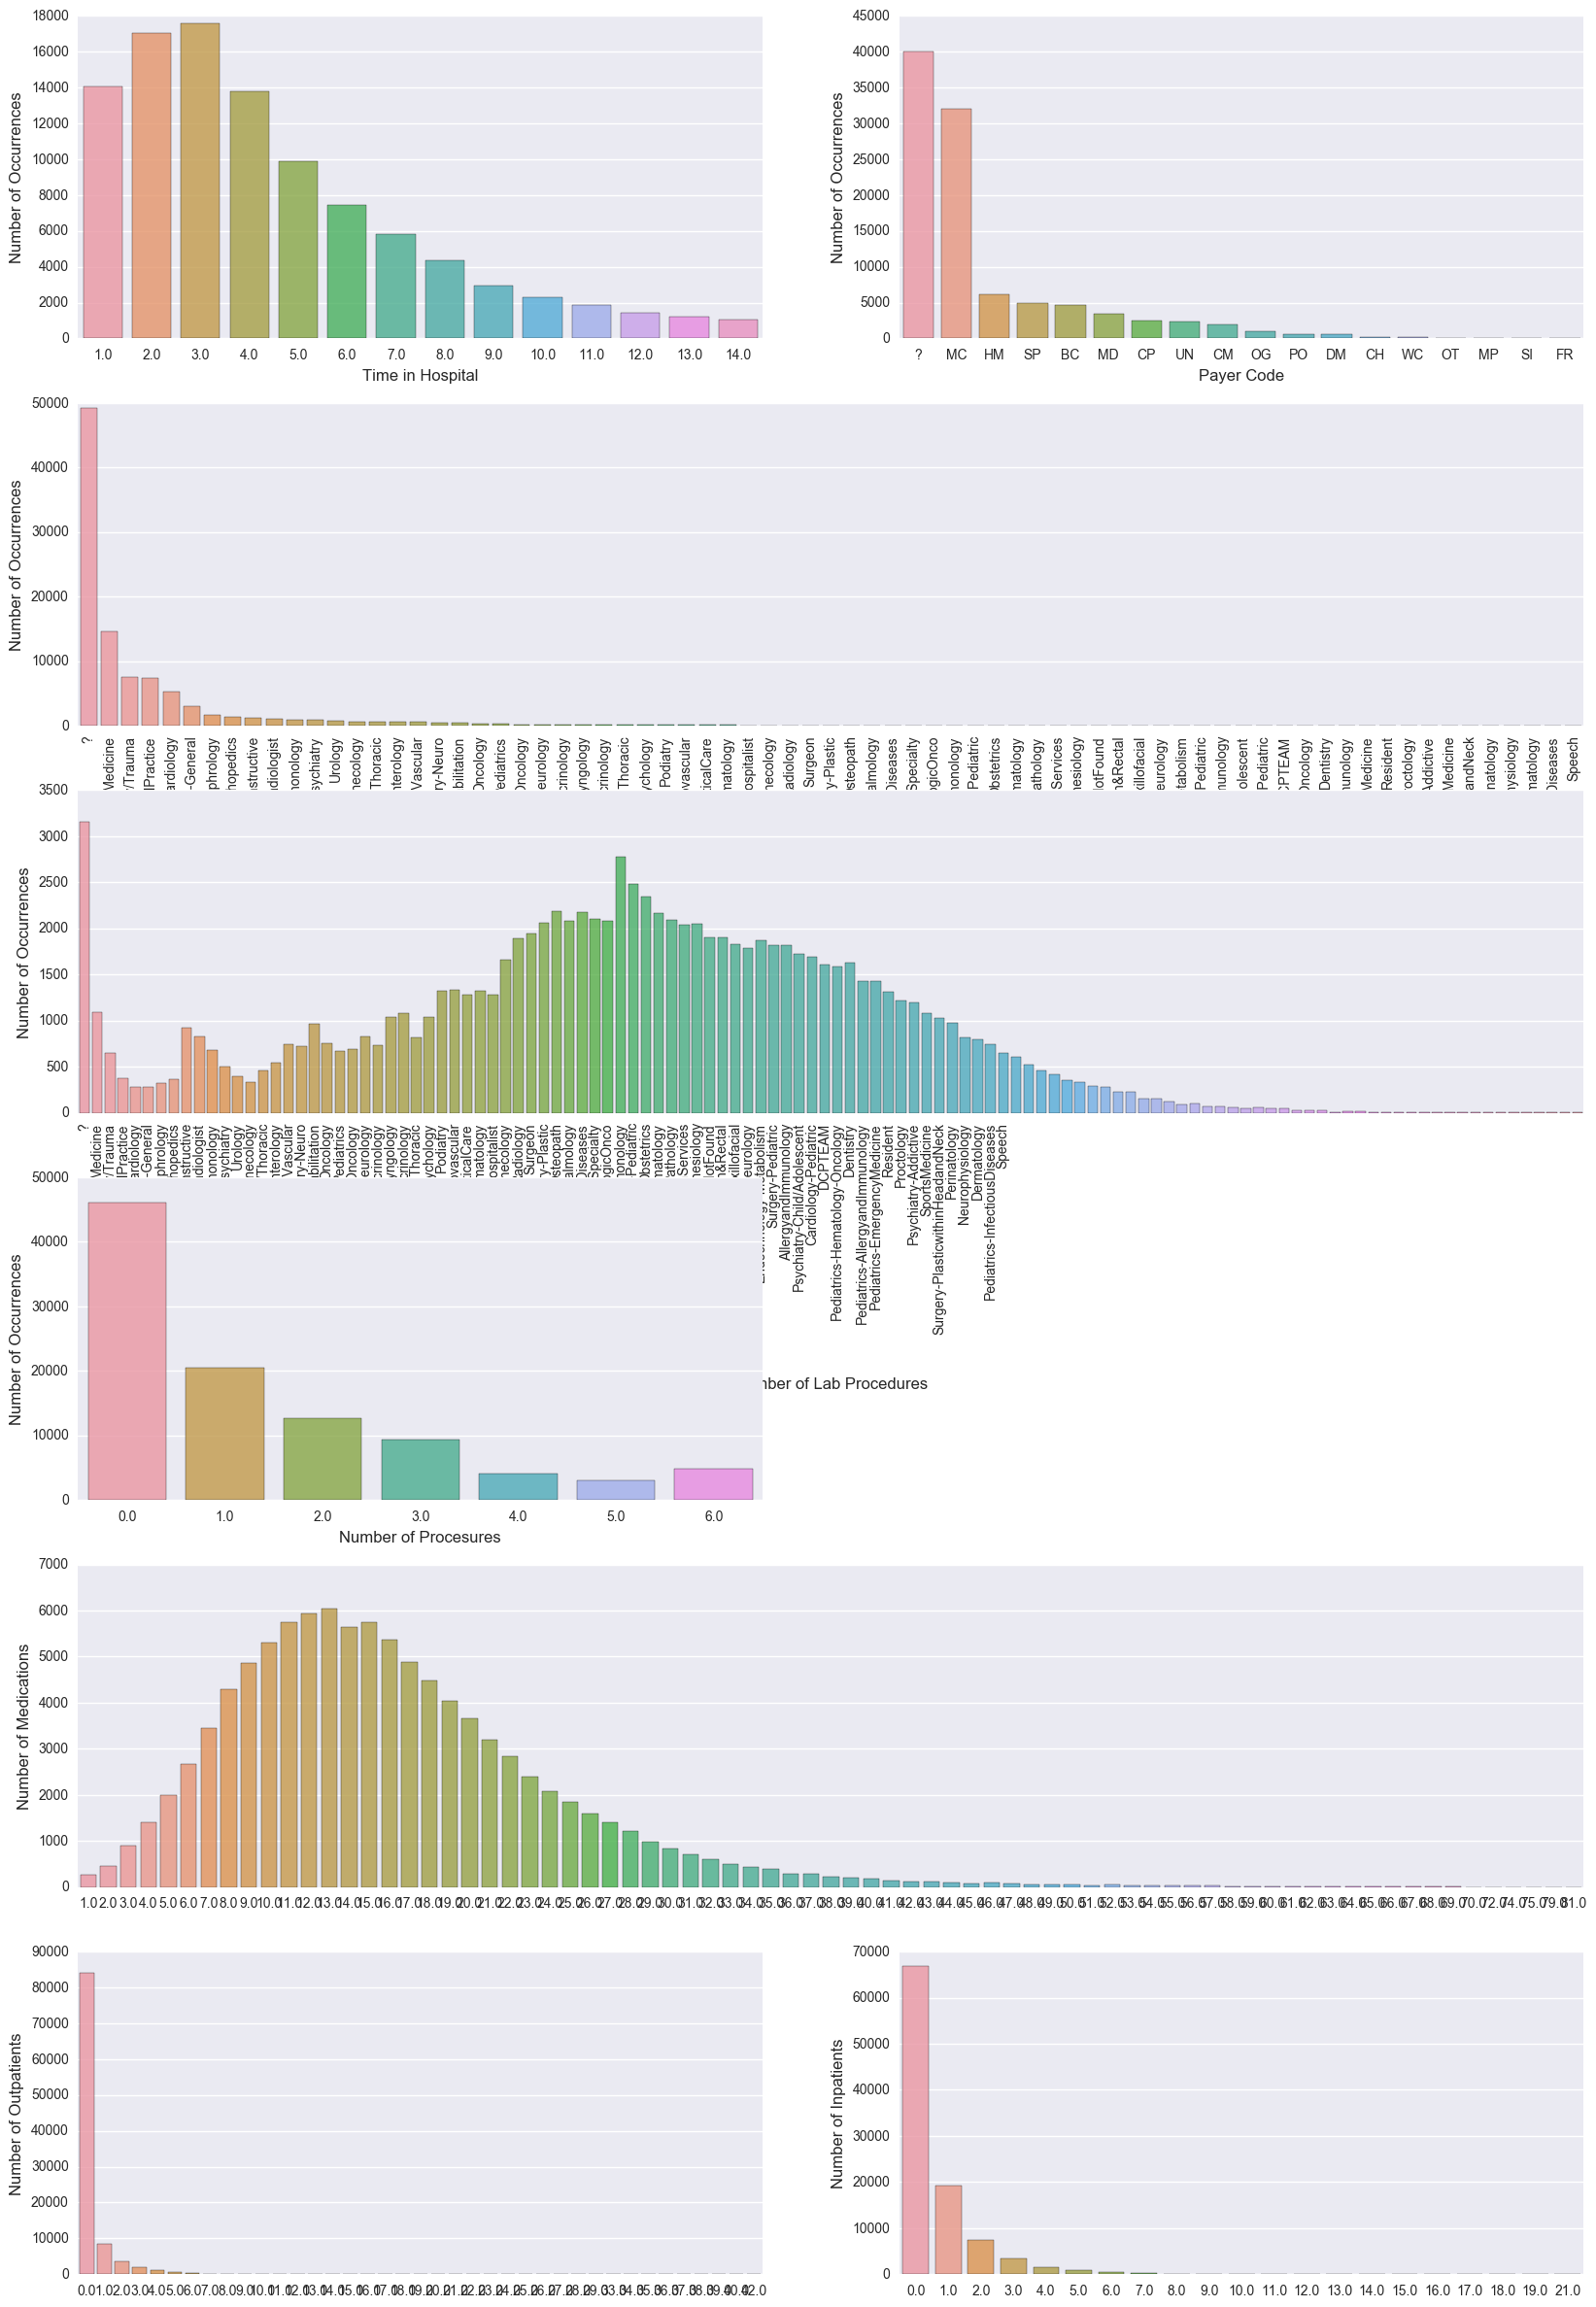

In [7]:
plt.rc('font', size=12)
fig = plt.figure(figsize=(20, 30))
alpha = 0.7

ax1 = plt.subplot2grid((6, 2), (0,0), colspan=1)
cnt_time_in_hosp = train_data['time_in_hospital'].value_counts()
sns.barplot(cnt_time_in_hosp.index, cnt_time_in_hosp.values, alpha=0.8)
ax1.set_ylabel("Number of Occurrences", fontsize=12)
ax1.set_xlabel("Time in Hospital", fontsize=12)

ax2 = plt.subplot2grid((6, 2), (0, 1), colspan=1)
cnt_payer_code = train_data['payer_code'].value_counts()
sns.barplot(cnt_payer_code.index, cnt_payer_code.values, alpha=0.8)
ax2.set_ylabel("Number of Occurrences", fontsize=12)
ax2.set_xlabel("Payer Code", fontsize=12)

ax3 = plt.subplot2grid((6, 2), (1, 0), colspan=2)
cnt_med_spec = train_data['medical_specialty'].value_counts()
g = sns.barplot(cnt_med_spec.index, cnt_med_spec.values, alpha=0.8)
g.set_xticklabels(cnt_med_spec.index, rotation=90)
ax3.set_ylabel("Number of Occurrences", fontsize=12)
ax3.set_xlabel("Medical Specialty", fontsize=12)

ax4 = plt.subplot2grid((6, 2), (2, 0), colspan=2)
cnt_n_lab_proc = train_data["num_lab_procedures"].value_counts()
g1 = sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
g1.set_xticklabels(cnt_med_spec.index, rotation=90)
ax4.set_ylabel("Number of Occurrences", fontsize=12)
ax4.set_xlabel("Number of Lab Procedures", fontsize=12)

ax5 = plt.subplot2grid((6, 2), (3, 0), colspan=1)
cnt_n_proc = train_data["num_procedures"].value_counts()
sns.barplot(cnt_n_proc.index, cnt_n_proc.values, alpha=0.8)
ax5.set_ylabel("Number of Occurrences", fontsize=12)
ax5.set_xlabel("Number of Procesures", fontsize=12)

ax6 = plt.subplot2grid((6, 2), (4, 0), colspan=2)
cnt_n_med = train_data["num_medications"].value_counts()
sns.barplot(cnt_n_med.index, cnt_n_med.values, alpha=0.8)
ax6.set_ylabel("Number of Occurrences", fontsize=12)
ax6.set_ylabel("Number of Medications", fontsize=12)

ax7 = plt.subplot2grid((6, 2), (5, 0), colspan=1)
cnt_n_outp = train_data["number_outpatient"].value_counts()
sns.barplot(cnt_n_outp.index, cnt_n_outp.values, alpha=0.8)
ax7.set_ylabel("Number of Occurrences", fontsize=12)
ax7.set_ylabel("Number of Outpatients", fontsize=12)

ax8 = plt.subplot2grid((6, 2), (5, 1), colspan=1)
cnt_n_inp = train_data["number_inpatient"].value_counts()
sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
ax8.set_ylabel("Number of Occurrences", fontsize=12)
ax8.set_ylabel("Number of Inpatients", fontsize=12)

plt.show()

In [8]:
#  'number_diagnoses',
#  'max_glu_serum',
#  'A1Cresult',
#  'metformin',
#  'repaglinide',
#  'nateglinide',
#  'chlorpropamide',
#  'glimepiride',
#  'acetohexamide',
#  'glipizide',
#  'glyburide',
#  'tolbutamide',
#  'pioglitazone',
#  'rosiglitazone',
#  'acarbose',
#  'miglitol',
#  'troglitazone',
#  'tolazamide',
#  'examide',
#  'citoglipton',
#  'insulin',
#  'glyburide-metformin',
#  'glipizide-metformin',
#  'glimepiride-pioglitazone',
#  'metformin-rosiglitazone',
#  'metformin-pioglitazone',

In [9]:
# plt.rc('font', size=13)
# fig = plt.figure(figsize=(20, 20))
# alpha = 0.7

# ax1 = plt.subplot2grid((3, 3), (0,0), colspan=3)
# cnt_diag1 = train_data['diag_1'].value_counts()
# g = sns.barplot(cnt_diag1.index, cnt_diag1.values, alpha=0.8)
# g.set_xticklabels(cnt_diag1.index, rotation=90)
# ax1.set_ylabel("Number of Occurrences", fontsize=12)
# ax1.set_xlabel("Diag 1", fontsize=12)

# ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
# cnt_diag2 = train_data['diag_2'].value_counts()
# g = sns.barplot(cnt_diag2.index, cnt_diag2.values, alpha=0.8)
# g.set_xticklabels(cnt_diag2.index, rotation=90)
# ax2.set_ylabel("Number of Occurrences", fontsize=12)
# ax2.set_xlabel("Diag 2", fontsize=12)

# # ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
# # cnt_diag3 = train_data['diag_3'].value_counts()
# # g = sns.barplot(cnt_diag3.index, cnt_diag2.values, alpha=0.8)
# # g.set_xticklabels(cnt_diag3.index, rotation=90)
# # ax3.set_ylabel("Number of Occurrences", fontsize=12)
# # ax3.set_xlabel("Diag 3", fontsize=12)

# plt.show()

In [10]:
# plt.rc('font', size=12)
# fig = plt.figure(figsize=(20, 50))
# alpha = 0.7

# ax1 = plt.subplot2grid((14, 2), (0,0), colspan=2)
# cnt_num_diag = train_data['number_diagnoses'].value_counts()
# sns.barplot(cnt_num_diag.index, cnt_num_diag.values, alpha=0.8)
# ax1.set_ylabel("Number of Occurrences", fontsize=12)
# ax1.set_xlabel("Number of Diagnoses", fontsize=12)

# ax2 = plt.subplot2grid((14, 2), (1, 0), colspan=1)
# cnt_max_glu_serum = train_data['max_glu_serum'].value_counts()
# sns.barplot(cnt_max_glu_serum.index, cnt_max_glu_serum.values, alpha=0.8)
# ax2.set_ylabel("Number of Occurrences", fontsize=12)
# ax2.set_xlabel("Max Glu Serum", fontsize=12)

# ax3 = plt.subplot2grid((14, 2), (1, 1), colspan=1)
# cnt_A1Cresult = train_data['A1Cresult'].value_counts()
# g = sns.barplot(cnt_A1Cresult.index, cnt_A1Cresult.values, alpha=0.8)
# ax3.set_ylabel("Number of Occurrences", fontsize=12)
# ax3.set_xlabel("A1C result", fontsize=12)

# ax4 = plt.subplot2grid((14, 2), (2, 0), colspan=1)
# cnt_n_lab_proc = train_data['metformin'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax4.set_ylabel("Number of Occurrences", fontsize=12)
# ax4.set_xlabel('Metformin', fontsize=12)

# ax5 = plt.subplot2grid((14, 2), (2, 1), colspan=1)
# cnt_n_lab_proc = train_data['repaglinide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax5.set_ylabel("Number of Occurrences", fontsize=12)
# ax5.set_xlabel('Repaglinide', fontsize=12)

# ax6 = plt.subplot2grid((14, 2), (3, 0), colspan=1)
# cnt_n_lab_proc = train_data['nateglinide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax6.set_ylabel("Number of Occurrences", fontsize=12)
# ax6.set_xlabel('Nateglinide', fontsize=12)

# ax7 = plt.subplot2grid((14, 2), (3, 1), colspan=1)
# cnt_n_lab_proc = train_data['chlorpropamide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax7.set_ylabel("Number of Occurrences", fontsize=12)
# ax7.set_xlabel('Chlorpropamide', fontsize=12)

# ax8 = plt.subplot2grid((14, 2), (4, 0), colspan=1)
# cnt_n_lab_proc = train_data['glimepiride'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax8.set_ylabel("Number of Occurrences", fontsize=12)
# ax8.set_xlabel('Glimepiride', fontsize=12)

# ax9 = plt.subplot2grid((14, 2), (4, 1), colspan=1)
# cnt_n_lab_proc = train_data['acetohexamide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax9.set_ylabel("Number of Occurrences", fontsize=12)
# ax9.set_xlabel('Acetohexamide', fontsize=12)

# ax10 = plt.subplot2grid((14, 2), (5, 0), colspan=1)
# cnt_n_lab_proc = train_data['glipizide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax10.set_ylabel("Number of Occurrences", fontsize=12)
# ax10.set_xlabel('Glipizide', fontsize=12)

# ax11 = plt.subplot2grid((14, 2), (5, 1), colspan=1)
# cnt_n_inp = train_data['glyburide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax11.set_ylabel("Number of Occurrences", fontsize=12)
# ax11.set_xlabel('Glyburide', fontsize=12)

# ax12 = plt.subplot2grid((14, 2), (6, 0), colspan=1)
# cnt_n_inp = train_data['tolbutamide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax12.set_ylabel("Number of Occurrences", fontsize=12)
# ax12.set_xlabel('Tolbutamide', fontsize=12)

# ax13 = plt.subplot2grid((14, 2), (6, 1), colspan=1)
# cnt_n_inp = train_data['pioglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax13.set_ylabel("Number of Occurrences", fontsize=12)
# ax13.set_xlabel('Pioglitazone', fontsize=12)

# ax14 = plt.subplot2grid((14, 2), (7, 0), colspan=1)
# cnt_n_inp = train_data['rosiglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax14.set_ylabel("Number of Occurrences", fontsize=12)
# ax14.set_xlabel('Rosiglitazone', fontsize=12)

# ax15 = plt.subplot2grid((14, 2), (7, 1), colspan=1)
# cnt_n_inp = train_data['acarbose'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax15.set_ylabel("Number of Occurrences", fontsize=12)
# ax15.set_xlabel('Acarbose', fontsize=12)

# ax16 = plt.subplot2grid((14, 2), (8, 0), colspan=1)
# cnt_n_inp = train_data['miglitol'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax16.set_ylabel("Number of Occurrences", fontsize=12)
# ax16.set_xlabel('Miglitol', fontsize=12)

# ax17 = plt.subplot2grid((14, 2), (8, 1), colspan=1)
# cnt_n_inp = train_data['troglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax17.set_ylabel("Number of Occurrences", fontsize=12)
# ax17.set_xlabel('Troglitazone', fontsize=12)

# ax18 = plt.subplot2grid((14, 2), (9, 0), colspan=1)
# cnt_n_inp = train_data['tolazamide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax18.set_ylabel("Number of Occurrences", fontsize=12)
# ax18.set_xlabel('Tolazamide', fontsize=12)

# ax19 = plt.subplot2grid((14, 2), (9, 1), colspan=1)
# cnt_n_inp = train_data['examide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax19.set_ylabel("Number of Occurrences", fontsize=12)
# ax19.set_xlabel('Examide', fontsize=12)

# ax20 = plt.subplot2grid((14, 2), (10, 0), colspan=1)
# cnt_n_inp = train_data['citoglipton'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax20.set_ylabel("Number of Occurrences", fontsize=12)
# ax20.set_xlabel('Citoglipton', fontsize=12)

# ax21 = plt.subplot2grid((14, 2), (10, 1), colspan=1)
# cnt_n_inp = train_data['insulin'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax21.set_ylabel("Number of Occurrences", fontsize=12)
# ax21.set_xlabel('Insulin', fontsize=12)

# ax22 = plt.subplot2grid((14, 2), (11, 0), colspan=1)
# cnt_n_inp = train_data['glyburide-metformin'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax22.set_ylabel("Number of Occurrences", fontsize=12)
# ax22.set_xlabel('Glyburide Metformin', fontsize=12)

# ax23 = plt.subplot2grid((14, 2), (11, 1), colspan=1)
# cnt_n_inp = train_data['glipizide-metformin'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax23.set_ylabel("Number of Occurrences", fontsize=12)
# ax23.set_xlabel('Glipizide Metformin', fontsize=12)

# ax24 = plt.subplot2grid((14, 2), (12, 0), colspan=1)
# cnt_n_inp = train_data['glimepiride-pioglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax24.set_ylabel("Number of Occurrences", fontsize=12)
# ax24.set_xlabel('Glimepiride-Pioglitazone', fontsize=12)

# ax25 = plt.subplot2grid((14, 2), (12, 1), colspan=1)
# cnt_n_inp = train_data['metformin-rosiglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax25.set_ylabel("Number of Occurrences", fontsize=12)
# ax25.set_xlabel('Metformin-Rosiglitazone', fontsize=12)

# ax26 = plt.subplot2grid((14, 2), (13, 0), colspan=1)
# cnt_n_inp = train_data['metformin-pioglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax26.set_ylabel("Number of Occurrences", fontsize=12)
# ax26.set_xlabel('Metformin-Pioglitazone', fontsize=12)

# plt.show()

In [11]:
# Remove useless columns
train_data.drop(["encounter_id", "patient_nbr"], axis=1, inplace=True)
train_data.dropna(subset=['discharge_disposition_id', 'admission_type_id', "time_in_hospital", "num_lab_procedures",
                          "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses",
                          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                          'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
                          'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                          "glyburide-metformin", 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                          "metformin-pioglitazone", 'change', 'diabetesMed', 'readmitted'], axis=0, inplace=True)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100702 entries, 0 to 100704
Data columns (total 48 columns):
race                        100702 non-null object
gender                      100702 non-null object
age                         100702 non-null object
weight                      100702 non-null object
admission_type_id           100702 non-null float64
discharge_disposition_id    100702 non-null float64
admission_source_id         100702 non-null float64
time_in_hospital            100702 non-null float64
payer_code                  100702 non-null object
medical_specialty           100702 non-null object
num_lab_procedures          100702 non-null float64
num_procedures              100702 non-null float64
num_medications             100702 non-null float64
number_outpatient           100702 non-null float64
number_emergency            100702 non-null float64
number_inpatient            100702 non-null float64
diag_1                      100702 non-null object
diag_2      

In [13]:
# sns.pairplot(train_data.iloc[:,], hue="admission_type_id")

In [14]:
print(train_data["gender"].value_counts())

Female             54141
Male               46558
Unknown/Invalid        3
Name: gender, dtype: int64


In [15]:
train_data = train_data[train_data.gender != "Unknown/Invalid"]
# train_data["gender"] = train_data["gender"].map({"M":0, "F":1})
train_data["gender"] = train_data["gender"].map({"Female":1, "Male":0})
# train_data["gender"].value_counts()

In [16]:
train_data["age"] = train_data["age"].map({"[0-10)":5,"[10-20)":15,"[20-30)":25,"[30-40)":35,
                                           "[40-50)":45,"[50-60)":55,"[60-70)":65,"[70-80)":75,"[80-90)":85})
# train_data["age"].value_counts()

In [17]:
train_data.drop("weight", axis=1, inplace=True) 

In [18]:
# mean_num_procedure= int(train_data["num_procedures"].mean())
# train_data["num_procedures"].value_counts()
# train_data["num_procedures"] = train_data["num_procedures"].map({"?": mean_num_procedure})
# train_data["num_procedures"].value_counts()

In [19]:
train_data["race"] = train_data["race"].map({"Caucasian":0,"AfricanAmerican": 1,"2": 2,"Hispanic": 3,
                                           "Other": 4,"Asian":5})
train_data["race"].value_counts()

0.0    75303
1.0    19073
3.0     2003
4.0     1464
5.0      624
Name: race, dtype: int64

In [20]:
train_data["race"].value_counts()

0.0    75303
1.0    19073
3.0     2003
4.0     1464
5.0      624
Name: race, dtype: int64

In [21]:
train_data["max_glu_serum"] = train_data["max_glu_serum"].map({"None":0, "Norm": 1, ">200": 2, ">300": 3})
train_data["A1Cresult"] = train_data["A1Cresult"].map({"None":0, "Norm": 1, ">7": 2, ">8": 3})
train_data["metformin"] = train_data["metformin"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["repaglinide"] = train_data["repaglinide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["insulin"] = train_data["insulin"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glimepiride"] = train_data["glimepiride"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glipizide"] = train_data["glipizide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glyburide"] = train_data["glyburide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3}) #
train_data["pioglitazone"] = train_data["pioglitazone"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["rosiglitazone"] = train_data["rosiglitazone"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})

In [22]:
# train_data["glyburide"] = train_data["glyburide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
# train_data["rosiglitazone"] = train_data["rosiglitazone"].maps({"No":0, "Steady": 1, "Up": 2, "Down": 3})

In [23]:
# train_data["medical_spec_val"] = 0
temp = pd.factorize(train_data.medical_specialty)[0]
for t in temp[:25]:
    print(t)

0
1
1
1
1
1
1
1
1
2
1
1
3
3
1
1
4
1
1
1
1
1
1
1
1


In [32]:
train_data["medical_spec_val"] = 0

train_data.medical_spec_val=pd.factorize(train_data.medical_specialty)[0]
train_data.medical_spec_val=pd.Categorical(pd.factorize(train_data.medical_specialty)[0])
#train_data.dtypes
#print(train_data.medical_spec_val)

In [38]:
dict(zip(train_data["medical_specialty"], train_data.medical_spec_val))

    

{'?': 1,
 'AllergyandImmunology': 45,
 'Anesthesiology': 43,
 'Anesthesiology-Pediatric': 27,
 'Cardiology': 4,
 'Cardiology-Pediatric': 67,
 'DCPTEAM': 71,
 'Dentistry': 49,
 'Dermatology': 62,
 'Emergency/Trauma': 12,
 'Endocrinology': 22,
 'Endocrinology-Metabolism': 70,
 'Family/GeneralPractice': 3,
 'Gastroenterology': 7,
 'Gynecology': 32,
 'Hematology': 56,
 'Hematology/Oncology': 18,
 'Hospitalist': 65,
 'InfectiousDiseases': 42,
 'InternalMedicine': 2,
 'Nephrology': 9,
 'Neurology': 26,
 'Neurophysiology': 69,
 'Obsterics&Gynecology-GynecologicOnco': 15,
 'Obstetrics': 58,
 'ObstetricsandGynecology': 16,
 'Oncology': 33,
 'Ophthalmology': 38,
 'Orthopedics': 6,
 'Orthopedics-Reconstructive': 10,
 'Osteopath': 52,
 'Otolaryngology': 19,
 'OutreachServices': 66,
 'Pathology': 61,
 'Pediatrics': 17,
 'Pediatrics-AllergyandImmunology': 48,
 'Pediatrics-CriticalCare': 21,
 'Pediatrics-EmergencyMedicine': 40,
 'Pediatrics-Endocrinology': 0,
 'Pediatrics-Hematology-Oncology': 29,
 '